![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Problemas Clássicos da Computação

## SVM

- Professor: Felipe Reis


## Referências

O presente tutorial foi inspirado em:

* Richert, W. and Coelho, L. P. (2013). Building Machine Learning Systems with Python. Ed. Packt Publishing Ltd., 1 edition.
* Marsland, S. (2014). Machine Learning: An Algorithm Perspective. CRC Press, 2 edition.


## Bibliotecas Necessárias

As bibliotecas necessárias à execução desse tutorial:
* Numpy: https://numpy.org/
* Matplotlib: https://matplotlib.org/
* Pandas: https://pandas.pydata.org/
* Sciki-Learn: https://scikit-learn.org/

---
## Instalação de Bibliotecas

In [1]:
# Execute essa linha para instalação no Google Colab
# Os pacotes numpy e matplotlib não precisam ser instalados
# Caso esteja usando seu computador pessoal, instale o pacote via linha de comando.

#!pip install -U pandas
#!pip install -U scikit-learn

---
## Importação de bibliotecas 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.decomposition import PCA, KernelPCA
from sklearn import svm

from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, auc, confusion_matrix
from sklearn.datasets import load_wine, load_boston, load_iris

---
## Funções Úteis

In [3]:
def split_data(x_data, y_data):
    return train_test_split(
            x_data,
            y_data, 
            test_size = 0.3, #percentual do conjunto de treino
            random_state = 10 #seed random, para resultados semelhantes
    )

In [4]:
def imprime_grafico_iris(data, target, targets_names, dt_column1=0, dt_column2=1):
    plt.figure()
    colors = ['red', 'green', 'blue']
    
    for color, i, target_name in zip(colors, [0, 1, 2], targets_names):
        x = data[target == i, dt_column1]
        y = data[target == i, dt_column2]
        
        plt.scatter(x, y, alpha=.8, color=color, label=target_name)

    #adiciona legenda e imprime gráfico
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.show()

---
## Wine e Íris Datasets

A primeira parte to tutorial utilizará a base de dados Iris Dataset (contém informações sobre a flor Íris), disponível nativamente pela biblioteca Scikit Learn.

A segunda parte do tutorial utilizará a base de dados Wine Dataset (contém informação sobre vinhos), disponível nativamente pela biblioteca Scikit Learn.

Informações sobre as bases de dados:
* Iris Dataset: https://sklearn.org/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
* Wine Dataset: https://sklearn.org/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

### Iris Dataset

In [11]:
#carrega a base de dados
iris = load_iris()

In [16]:
X_train, X_test, y_train, y_test = split_data(iris.data, iris.target)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


In [18]:
model = svm.SVC(kernel='poly', degree=2)
model.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

In [22]:
predictions_poly = model.predict(X_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("2nd degree polynomial Kernel\nAccuracy (normalized): " + str(accuracy_poly))

2nd degree polynomial Kernel
Accuracy (normalized): 1.0


### Wine Dataset

In [7]:
#carrega a base de dados
wine = load_wine()

In [8]:
X_train, X_test, y_train, y_test = split_data(wine.data, wine.target)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(124, 13) (124,)
(54, 13) (54,)


In [9]:
model = svm.SVC(kernel='poly', degree=2)
model.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

In [10]:
predictions_poly = model.predict(X_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("2nd degree polynomial Kernel\nAccuracy (normalized): " + str(accuracy_poly))

2nd degree polynomial Kernel
Accuracy (normalized): 0.6111111111111112


Podemos avaliar múltiplos tipos de SVM, para verificarmos aquele que melhor se adapta ao problema.

In [19]:
for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = svm.SVC(kernel=k, degree=2)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    print("Kernel:", k)
    print("Accuracy: ", accuracy_score(y_test, predictions))
    print()

Kernel: linear
Accuracy:  0.9074074074074074

Kernel: poly
Accuracy:  0.6111111111111112

Kernel: rbf
Accuracy:  0.6111111111111112

Kernel: sigmoid
Accuracy:  0.18518518518518517



In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [26]:
for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = make_pipeline(StandardScaler(), svm.SVC(gamma='auto', kernel=k, degree=2))
    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)
    print("Kernel:", k)
    print("Accuracy: ", accuracy_score(y_test, predictions))
    print()

Kernel: linear
Accuracy:  0.9259259259259259

Kernel: poly
Accuracy:  0.8703703703703703

Kernel: rbf
Accuracy:  0.9629629629629629

Kernel: sigmoid
Accuracy:  0.9074074074074074



#### Análise de Discriminantes Lineares (LDA)

Podemos utilizar a Análise de Discriminantes Lineares (LDA) para separar as classes e fazer previsões.

In [12]:
X_train, X_test, y_train, y_test = split_data(wine.data, wine.target)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(124, 13) (124,)
(54, 13) (54,)


In [13]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [14]:
predictions = lda.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Accuracy: " + str(acc))

Accuracy: 0.9074074074074074


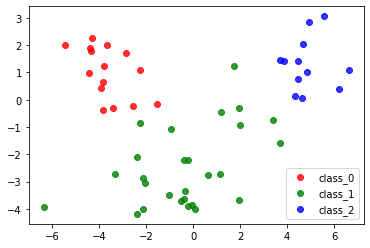

In [17]:
lda_plot = lda.transform(X_test)
imprime_grafico_iris(lda_plot, y_test, wine.target_names)